In this project we will explore the iris dataset, explore the data this dataset proportion us, what characteristics it has, analyze the specific characteristics of each iris type,   create charts to see how its data is related, we will transform the data, fit it in a Machine Learning model and finally deploy it using Flask.

In [161]:
#Imports the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import plotly.express as px

The features that will be proportioned to us are:
- Sepal Length (in cm)
- Sepal Width (in cm)
- Petal Length (in cm)
- Petal width (in cm)

There will be 3 types of iris we will clasiffy: Setosa, Versicolor and Virginica with target values 0, 1 and 2 respectively

In [162]:
#Obtain data
data = load_iris(as_frame=True)
X = data.data
y = data.target
df = pd.concat([X,y], axis=1)

In [163]:
#DataFrame shape
df.shape

(150, 5)

Our dataset contains 150 rows and 5 columns (including target)

In [164]:
#First five rows of dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [165]:
#Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


We dont have null values and the features are float types, target takes values 0, 1 and 2

In [166]:
#Statistics about dataframe columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [167]:
#Number of each target value
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

We can see there are 50 instances per each type of iris

CHARTS

For purposes of identifying each type of iris we will map the target values to the iris type

In [168]:
df2 = df.copy()
df2['target']=df2['target'].map({0:'Setosa',1:'Versicolor',2:'Virginica'})

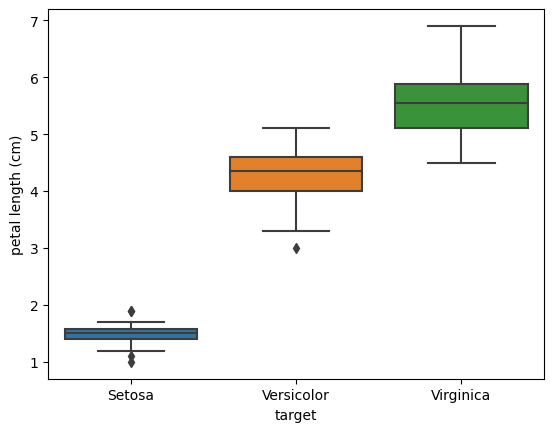

In [169]:
#Boxplot of petal length divided by iris type
sns.boxplot(data = df2, x = 'target', y='petal length (cm)');

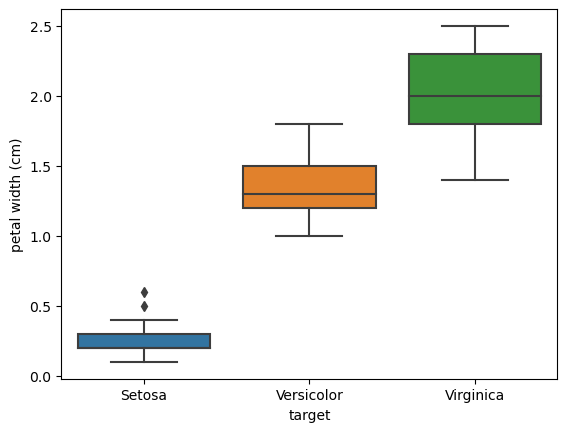

In [170]:
#Boxplot of petal width divided by iris type
sns.boxplot(data = df2, x = 'target', y='petal width (cm)');

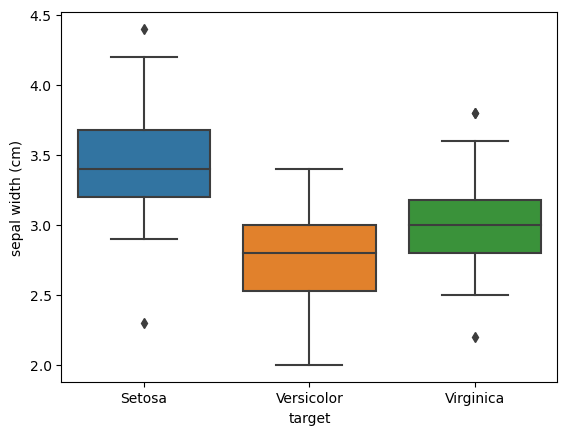

In [171]:
#Boxplot of sepal width divided by iris type
sns.boxplot(data = df2, x = 'target', y='sepal width (cm)');

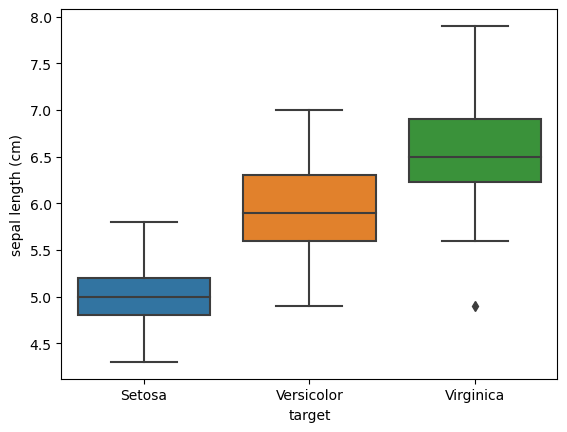

In [172]:
#Boxplot of sepal length divided by iris type
sns.boxplot(data = df2, x = 'target', y='sepal length (cm)');

Conclusions from the charts the charts:
- Setosa has a lower petal length and width, a lower sepal length but a higher sepal width
- Versicolor has a medium petal length a width, a medium sepal length but a lower sepal width (in comparisson with the other types)
-Virginica has a higher petal length and width, sepal length and a medium sepal width

How are the petal length and width related?

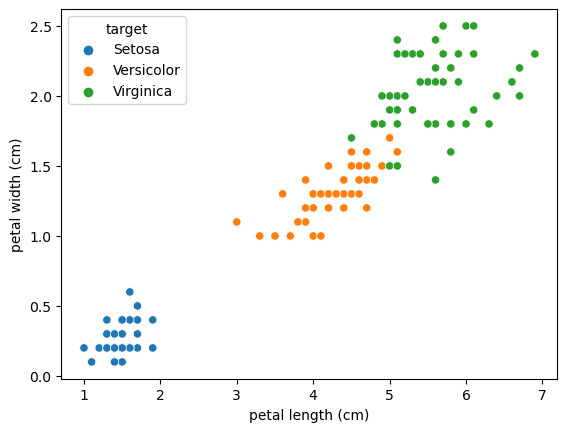

In [173]:
sns.scatterplot(data = df2, x='petal length (cm)', y='petal width (cm)', hue='target');

We can conclude that these two variables are correlated, a lower petal length implies a lower petal width and viceversa, also we can see that these dots are clearly divided into iris types, with setosa having the lowest petal length and width and viriginica having the largest petal length and width.

How are the sepal length and petal width related?

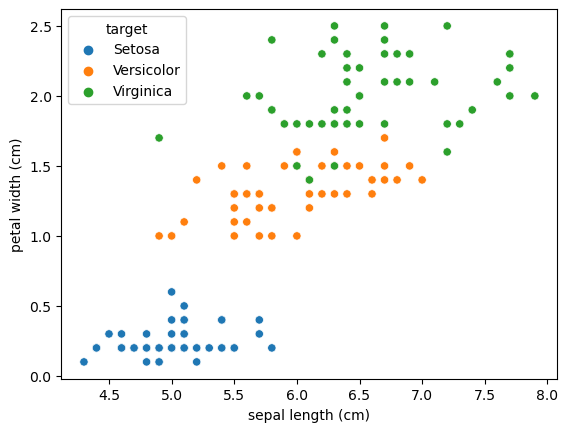

In [174]:
sns.scatterplot(data = df2, x='sepal length (cm)', y='petal width (cm)', hue='target');

We can conclude that we can also divide the iris types using these two features

In [175]:
#We will divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [176]:
#Load the model and train it
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

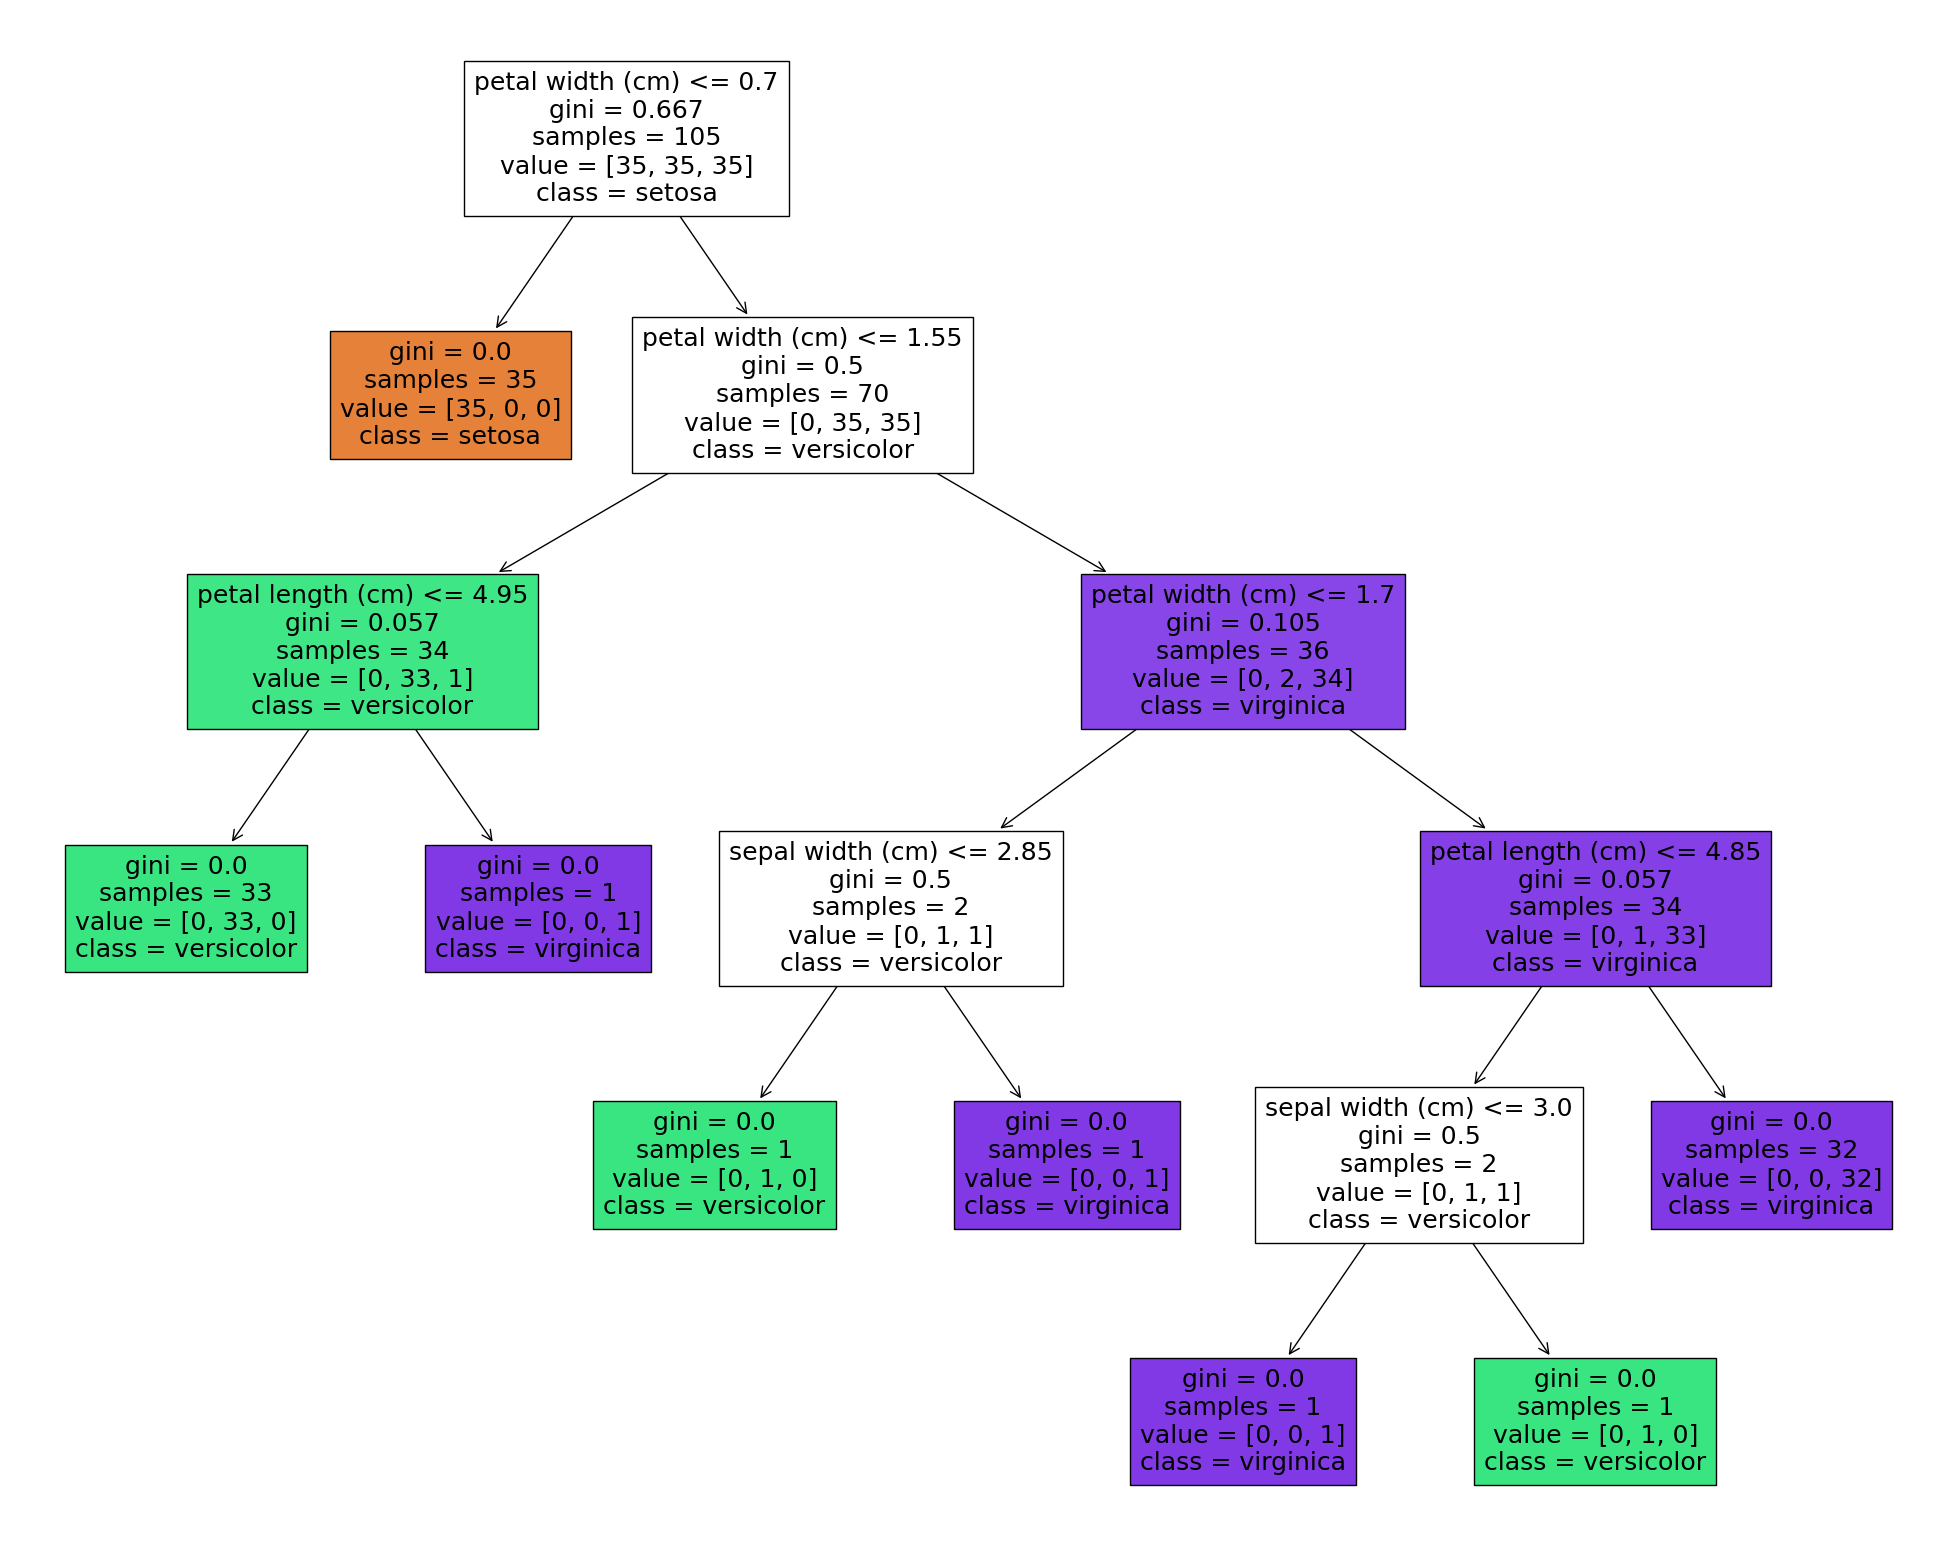

In [177]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)

In [178]:
#Test the model
y_pred = dt.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'The accuracy is {acc}')

The accuracy is 0.9333333333333333


We got an accuracy of 0.933 using Decision Tree Regressor

In [180]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [181]:
acc = accuracy_score(y_pred, y_test)
print(f'The accuracy score is {acc}')

The accuracy score is 0.9777777777777777


We got an accuracy of 0.977 being the K-Neighbors Classifier slighly better